<a href="https://colab.research.google.com/github/AjayUnique/EDA-playstore-app/blob/main/PlayStore_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [87]:
import warnings
warnings.filterwarnings("ignore") 

Importing the dataset into google colab

In [88]:
playdf = pd.read_csv("/content/drive/MyDrive/Capstone_Project_1/Play Store Data.csv")

In [89]:
playdf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [90]:
playdf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [91]:
playdf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [92]:
playdf.describe(include='O').T

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [93]:
playdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Converting Rating,Reviews,Size,Installs and Price columns into 'int' dtype 

In [94]:
playdf.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

'Rating' contains 1474 null values 

In [95]:
playdf['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

1181 Apps are duplicated entries in the dataset

# **Data Cleaning**

In [96]:
playdf=playdf.drop_duplicates('App')

In [97]:
playdf.shape

(9660, 13)

All duplicates values are removed from 'App' column

In [98]:
playdf.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [99]:
#To minimize data loss we will fill the null values under "Rating" column by mean through category wise

In [100]:
playdf['Rating'].fillna(playdf.groupby('Category')['Rating'].transform('mean'),inplace=True)     

In [101]:
playdf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [102]:
playdf.dropna(inplace=True)

In [103]:
playdf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


Conversion of 'Reviews' column from object dtype to numerical dtype

In [104]:
playdf['Reviews']=playdf['Reviews'].astype(int)                   # converting into int dtype

In [105]:
playdf['Reviews'].dtype

dtype('int64')

Conversion of 'Size' column from object dtype to numerical dtype




In [106]:
playdf['Size'].unique()                              # Values contains M or k at the end as Megabytes or kilobytes resp.
                                                     #Some value contains 'Varies with devices' '

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [107]:
playdf['Size'].replace('Varies with device',np.nan, inplace=True)             # converting 'Varies with device' value to Null value

In [108]:
playdf['Size']=playdf['Size'].apply(lambda x:str(x).replace('M',''))
playdf['Size']=playdf['Size'].apply(lambda x:str(x).replace('k','e-3'))       # replacing k(kilobytes) into Megabytes format 

In [109]:
playdf['Size'].shape

(9648,)

In [110]:
playdf['Size']=playdf['Size'].astype(float)

In [111]:
playdf['Size'].dtype

dtype('float64')

In [112]:
playdf['Size'].fillna(playdf.groupby('Category')['Size'].transform('mean'), inplace=True)

Conversion of 'Installs' column from object dtype to numerical dtype

In [113]:
playdf['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9648, dtype: object

In [114]:
playdf['Installs']=playdf['Installs'].apply(lambda x:x.replace('+',''))
playdf['Installs']=playdf['Installs'].apply(lambda x:x.replace(',',''))

In [115]:
playdf['Installs']=playdf['Installs'].astype(int)                   # converting into int dtype

In [116]:
playdf['Installs'].dtype

dtype('int64')

In [117]:
#Removing rows in which Reviews is greater than Installs. 

conditions = [    playdf['Reviews']>playdf['Installs'],                
                  playdf['Reviews']<=playdf['Installs']          ]

choice = ['Remove', 'Keep']

playdf['Decision'] = np.select(conditions, choice)

In [118]:
playdf['Decision'].value_counts()

Keep      9637
Remove      11
Name: Decision, dtype: int64

In [119]:
playdf.shape

(9648, 14)

In [120]:
playdf['Price']=playdf['Price'].apply(lambda x:x.replace('$',''))         # converting dtype of 'Price' from object to numerical.

In [121]:
playdf['Price'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9648, dtype: float64

In [122]:
playdf['Price']=playdf['Price'].astype(float)


In [123]:
playdf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Decision          0
dtype: int64

In [124]:
playdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
 13  Decision        9648 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


Now we have five numerical dtype columns such as 'Rating ,Reviews, Size, Installs and Price'


---



# Data Visualization

**Basic EDA**

<Figure size 432x432 with 0 Axes>

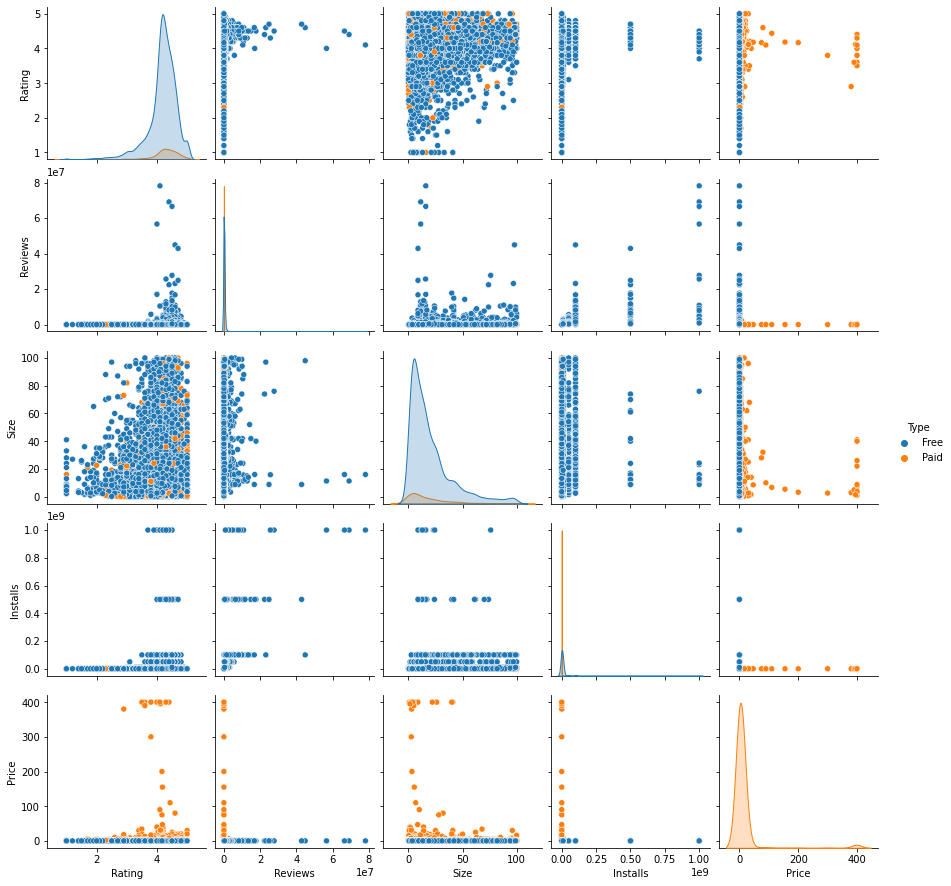

In [125]:
plt.figure(figsize=(6,6))
sns.pairplot(playdf,hue="Type")

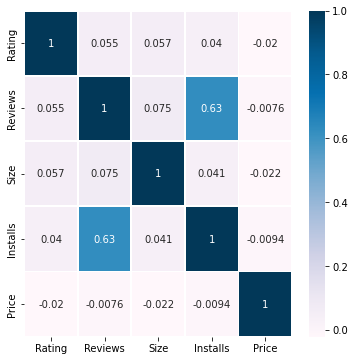

In [126]:
plt.figure(figsize=(6,6))
sns.heatmap(playdf.corr(),annot=True,linewidths=0.8,cmap='PuBu')
plt.show()

  What we got:

  1. We can see that 'Rating' and 'Reviews' are highly positive correlated.
  2. 'Installs' and 'Size' are also correlated positive.
  3. Most of the columns are negative correlated with 'Price' column

**Content Rating**

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


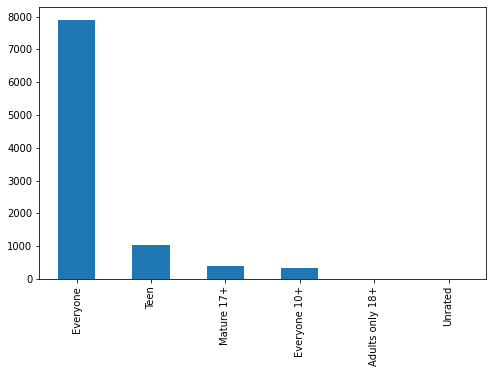

In [127]:
plt.figure(figsize=(8,5))
playdf['Content Rating'].value_counts().plot(kind='bar')
print(playdf['Content Rating'].value_counts())

      Most of the apps are rated "Everyone".Only fews are rated for "Adults ony 18+" and "Unrated"

**Categories**

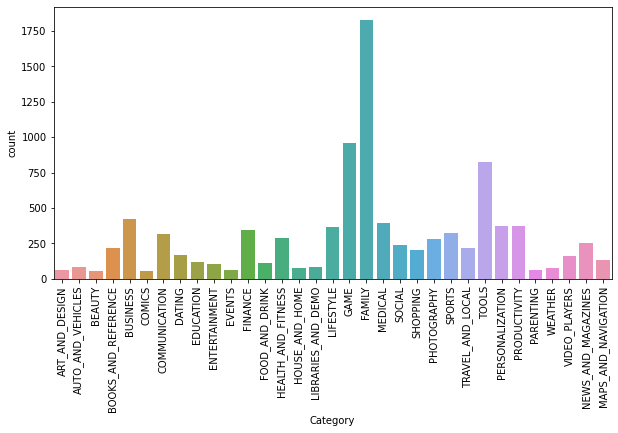

In [128]:
plt.figure(figsize=(10,5))
sns.countplot(playdf['Category'])
plt.xticks(rotation=90)
plt.show()

Majority of the apps are in Family category

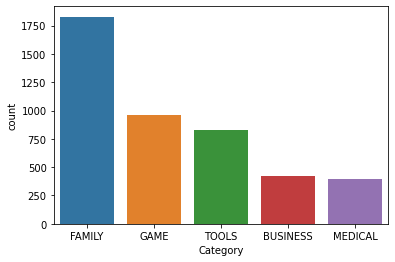

In [129]:
sns.countplot(x=playdf['Category'],order=pd.value_counts(playdf['Category']).iloc[:5].index)

        Top 5 Categories are:

        1. Family
        2. Game
        3. Tools
        4. Business
        5. Medical

**Type**

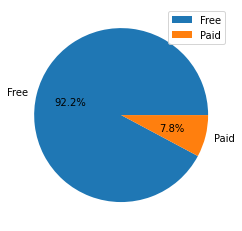

In [130]:
labels=playdf['Type'].value_counts(sort=True).index
plt.figure(figsize=(4,4))
plt.pie(playdf['Type'].value_counts(),labels=labels,autopct='%1.1f%%')
plt.legend()
plt.show()

**Price Distrubution in Paid Apps** 




In [131]:
paid_apps=playdf[playdf['Type']=='Paid']

In [132]:
playdf['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 9648, dtype: object

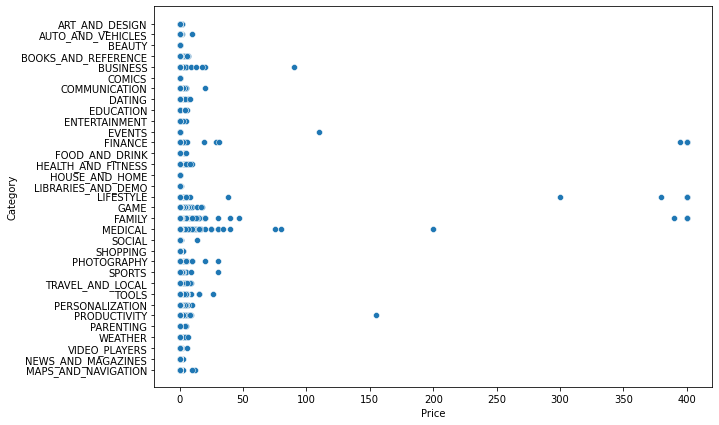

In [133]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=paid_apps,x=playdf['Price'],y=playdf['Category'])
plt.show()

    Family and Medical have the most paid apps.

In [134]:
paid_apps['Price'].max()

400.0

In [135]:
paid_apps[paid_apps['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Decision
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,Keep


    The 'I'm Rich - Trump Edition' app is found to be the highest paid app.

In [136]:
paid_apps['Installs'].max()

10000000

In [137]:
paid_apps[paid_apps['Installs']==10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Decision
2241,Minecraft,FAMILY,4.5,2376564,27.222893,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,Keep
4034,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,Keep


    Minecraft and Hitman Sniper are the most downloaded paid apps 

**Rating**

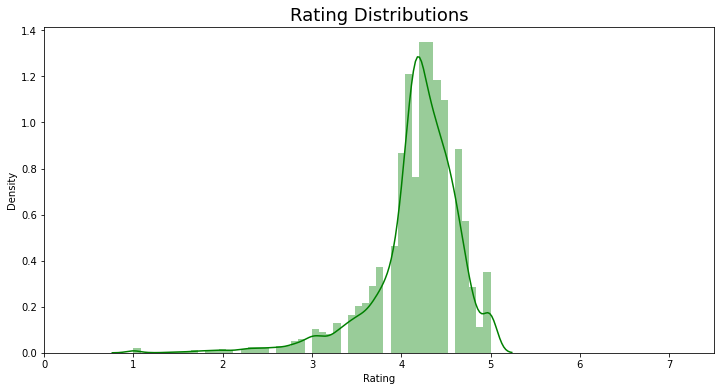

In [138]:
plt.figure(figsize=(12,6))
plt.title('Rating Distributions',size = 18)
sns.distplot(playdf['Rating'],color='green')
plt.xlim(0,7.5)
plt.show()

    Most of the apps are rated between 4 to 4.5

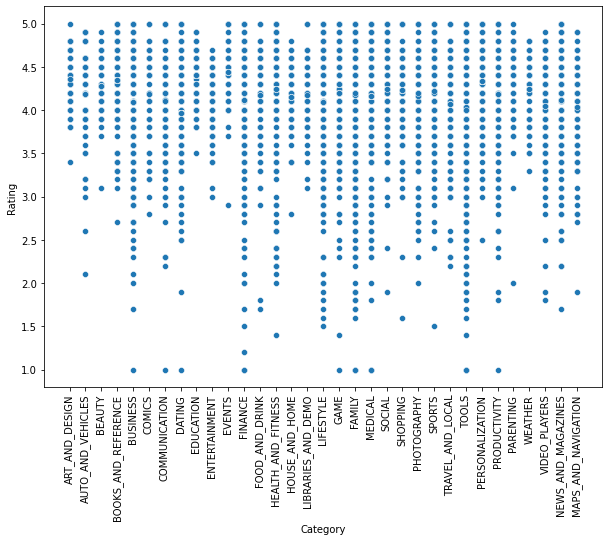

In [139]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=paid_apps,y=playdf['Rating'],x=playdf['Category'])
plt.xticks(rotation=90)
plt.show()

    Category wise rating donot differ much

**Top 5 Categories based on Ratings (min. 15,000 downloads)**

In [140]:
apps_with_15k=playdf[playdf['Installs']>=15000]

In [141]:
category_15k = apps_with_15k.groupby(['Category'])

In [142]:
category_15k['Rating'].mean().sort_values(ascending=False).iloc[:5]

Category
BOOKS_AND_REFERENCE    4.396930
EDUCATION              4.367539
PARENTING              4.364103
HEALTH_AND_FITNESS     4.356757
PERSONALIZATION        4.326660
Name: Rating, dtype: float64

    So Top 5 Category based on ratings and having minimum 15k downloads are as shown above

**Genres**

In [143]:
playdf['Genres'].nunique()

118

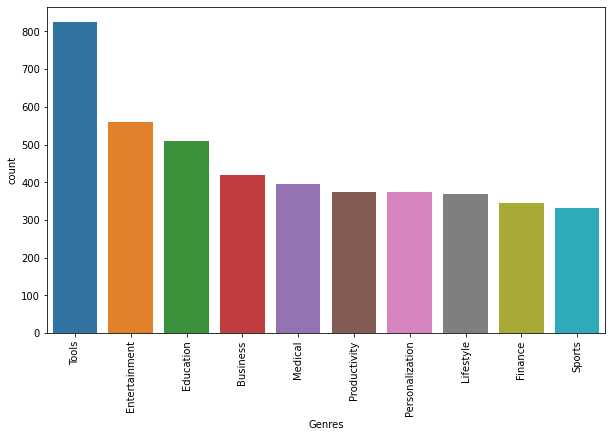

In [144]:
plt.figure(figsize=(10,6))
sns.countplot(x=playdf['Genres'],order=pd.value_counts(playdf['Genres']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

    Most frequent genres are Tools,Entertainment,Education

In [145]:
gen_15k=apps_with_15k.groupby(['Genres'])

In [146]:
gen_15k['Rating'].mean().sort_values(ascending=False).iloc[:5]

Genres
Comics;Creativity              4.8
Health & Fitness;Education     4.7
Puzzle;Education               4.6
Adventure;Brain Games          4.6
Strategy;Action & Adventure    4.6
Name: Rating, dtype: float64

    Comics;Creativity is the highest rated genre followed by Health & Fitness;Education and Books & Reference

**Android Version**

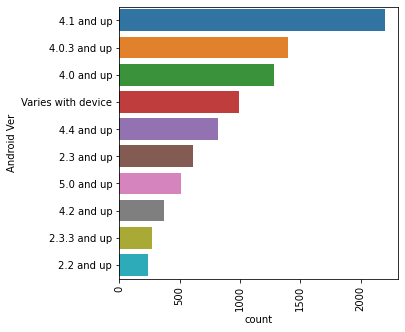

In [147]:
plt.figure(figsize=(5,5))
sns.countplot(y=playdf['Android Ver'],order=pd.value_counts(playdf['Android Ver']).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

    Most of the apps are made compatible with Android version 4(Jellybean) and above

**App Size**

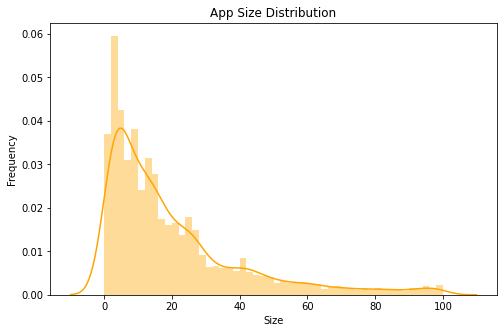

In [148]:
plt.figure(figsize=(8,5))
sns.distplot(playdf['Size'],color='orange')
plt.title('App Size Distribution')
plt.ylabel('Frequency')
plt.show()

In [149]:
# Many of the apps lie in 0-20 mb range
(playdf[playdf['Size']<=20].shape[0]/playdf['Size'].shape[0])*100   #Percentage calculation less than or equal to 20mb

64.98756218905473

    Almost 65% of apps's size lies between 0-20 Mb

**Top Categories based on Installs(having maximum Installs and ratings)**

In [150]:
playdf['Installs'].max()

1000000000

In [151]:
most_installs=playdf[playdf['Installs']==1000000000] 

In [152]:
cat_download=most_installs.groupby(['Category'])

In [153]:
cat_download['Rating'].mean().sort_values(ascending=False).iloc[:5]

Category
GAME             4.5
PHOTOGRAPHY      4.5
PRODUCTIVITY     4.4
TOOLS            4.4
ENTERTAINMENT    4.3
Name: Rating, dtype: float64

This are the Top 5 Category with maximun download and high rating

# **User Reviews Sentiment Analysis**

In [154]:
reviews_data=pd.read_csv('/content/drive/MyDrive/Capstone_Project_1/User Reviews .csv')

In [155]:
reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [156]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [157]:
reviews_data.isna().sum() #Many null values

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [158]:
((reviews_data.isna().sum()[1])/reviews_data.shape[0])*100 # ~42% null values in 3 columns

41.7886305311455

**Merging Data**

In [159]:
df_merged = pd.merge(playdf, reviews_data, on = "App", how = "inner") #Merging both datasets on Apppl

In [160]:
df_merged = df_merged.dropna(subset=['Translated_Review', 'Sentiment']) #Dropping null values

In [161]:
df_merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Decision,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Keep,I hate,Negative,-0.800,0.900000


**Sentiment Polarity Between Free and Paid Apps**

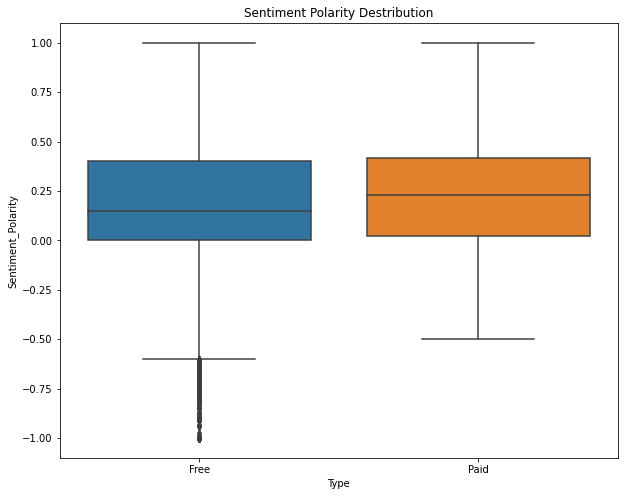

In [162]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type', y='Sentiment_Polarity', data=df_merged)
plt.title('Sentiment Polarity Destribution')
plt.show()

    Free apps relatively recieve more negative comments(outliers on the negative Y-axis) than paid apps.

  

**WORKCLOUD**

In [163]:
from wordcloud import WordCloud,STOPWORDS

In [164]:
stopwords = set(STOPWORDS)

In [165]:
#separating the merged data into negative and positive dataframe
negative_df = df_merged[df_merged['Sentiment']=='Negative'] 
postive_df = df_merged[df_merged['Sentiment']=='Positive']

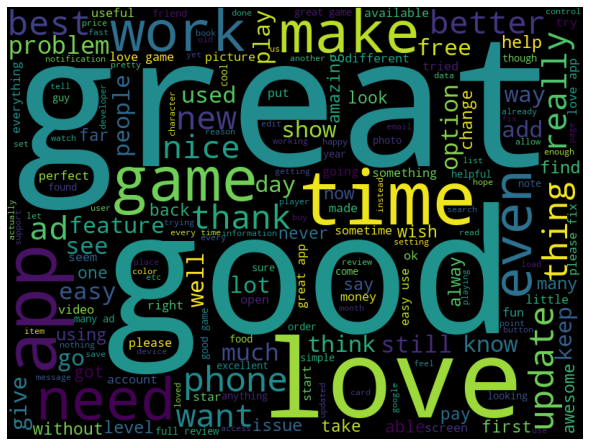

In [166]:
#To generate wordcloud image fo positive reviews
words = ''
for s in postive_df['Translated_Review']:

    s = str(s) # typecaste each val to string
    x = s.split()# split the value
    
    for i in range(len(x)):# Converts each token into lowercase
        x[i] = x[i].lower()
     
    words = words + " ".join(x)+" "
 
wc = WordCloud(width = 800, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8))
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

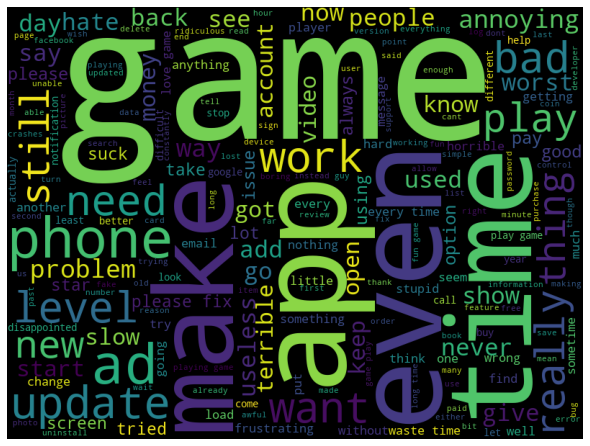

In [167]:
#To generate wordcloud image for negative reviews
words = ''
for s in negative_df['Translated_Review']:

    s = str(s) # typecaste each val to string
    x = s.split()# split the value
    
    for i in range(len(x)):# Converts each token into lowercase
        x[i] = x[i].lower()
     
    words = words + " ".join(x)+" "
 
wc = WordCloud(width = 800, height = 600,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


**Positive Reviews**: "great, love, thank, good"      
**Negative Reviews**: "ad, update,hate,bad"